In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from glob import glob
from pathlib import Path
track_summary_csvs = glob('/data/Houston/TRACER_TRACKING_graupel/csv_results/*.csv')
track_summary_csvs.sort()

In [3]:
def parse_track_file(one_file):
    one_csv = pd.read_csv(one_file)
    one_path = Path(one_file)
    date = datetime.datetime.strptime(one_path.parts[-1], 'tobac_Save_%Y%m%dresults.csv')
    one_csv['date']=[date]
    one_csv = one_csv.set_index('date')
    return one_csv


track_df = pd.concat([parse_track_file(one_file) for one_file in track_summary_csvs])
column_renamer = dict((name, name.replace('dir', '')) for name in track_df.columns)
track_df = track_df.rename(columns=column_renamer)
track_df['total'] = track_df.sum('columns')
fraction_df = track_df.div(track_df.total, axis=0)

In [4]:
print(track_df.total)
track_df

date
2022-06-02     770
2022-06-04     516
2022-06-17     936
2022-06-21     904
2022-06-22     650
2022-07-02    1051
2022-07-06     397
2022-07-12    1827
2022-07-13    1185
2022-07-28     914
2022-07-29     605
Name: total, dtype: int64


,nothing,zdr,kdp,kdp_zdr,ltg_only,kdp_zdr_ltg,kdp_ltg,zdr_ltg,total
date,,,,,,,,,
2022-06-02,76,430,1,210,1,51,0,1,770
2022-06-04,99,217,4,164,0,28,0,4,516
2022-06-17,61,576,1,165,0,120,0,13,936
2022-06-21,56,576,0,231,0,41,0,0,904
2022-06-22,82,365,2,154,0,46,0,1,650
2022-07-02,149,557,1,251,0,84,0,9,1051
2022-07-06,54,243,1,84,0,14,0,1,397
2022-07-12,189,1449,0,106,1,79,0,3,1827
2022-07-13,235,799,1,111,0,35,0,4,1185


In [5]:
fraction_df

,nothing,zdr,kdp,kdp_zdr,ltg_only,kdp_zdr_ltg,kdp_ltg,zdr_ltg,total
date,,,,,,,,,
2022-06-02,0.098701,0.558442,0.001299,0.272727,0.001299,0.066234,0.0,0.001299,1.0
2022-06-04,0.191860,0.420543,0.007752,0.317829,0.000000,0.054264,0.0,0.007752,1.0
2022-06-17,0.065171,0.615385,0.001068,0.176282,0.000000,0.128205,0.0,0.013889,1.0
2022-06-21,0.061947,0.637168,0.000000,0.255531,0.000000,0.045354,0.0,0.000000,1.0
2022-06-22,0.126154,0.561538,0.003077,0.236923,0.000000,0.070769,0.0,0.001538,1.0
2022-07-02,0.141770,0.529971,0.000951,0.238820,0.000000,0.079924,0.0,0.008563,1.0
2022-07-06,0.136020,0.612091,0.002519,0.211587,0.000000,0.035264,0.0,0.002519,1.0
2022-07-12,0.103448,0.793103,0.000000,0.058019,0.000547,0.043240,0.0,0.001642,1.0
2022-07-13,0.198312,0.674262,0.000844,0.093671,0.000000,0.029536,0.0,0.003376,1.0


In [6]:
fraction_df.mean()

nothing        0.117006
zdr            0.591100
kdp            0.001992
kdp_zdr        0.215101
ltg_only       0.000468
kdp_zdr_ltg    0.068793
kdp_ltg        0.000000
zdr_ltg        0.005541
total          1.000000
dtype: float64

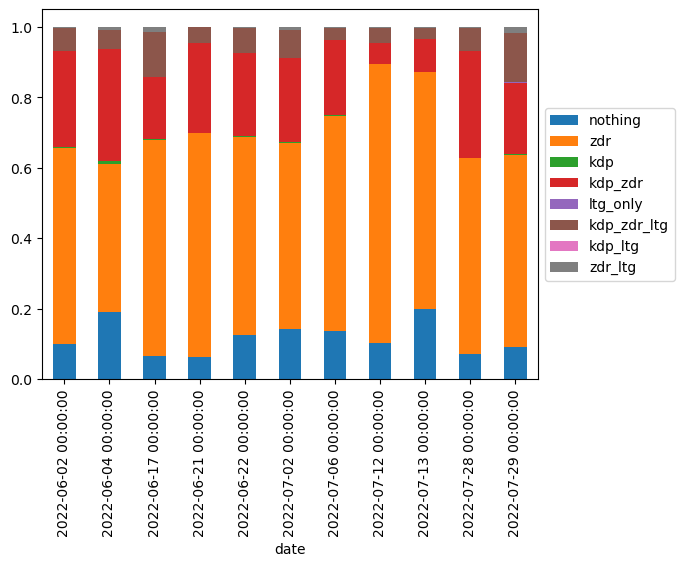

In [7]:
all_cols = list(fraction_df.columns)
all_cols.remove('total')
fraction_df[all_cols].plot.bar(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

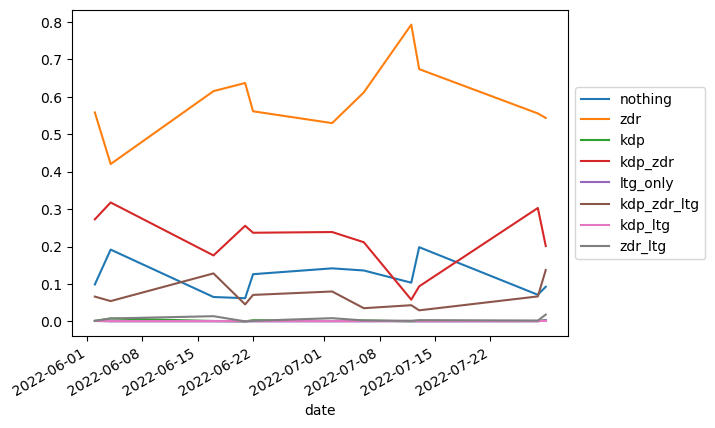

In [8]:
fraction_df[all_cols].plot().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [9]:
all_cases = track_df.sum(axis=0)

In [10]:
all_cases

nothing        1122
zdr            6049
kdp              14
kdp_zdr        1875
ltg_only          4
kdp_zdr_ltg     642
kdp_ltg           0
zdr_ltg          49
total          9755
dtype: int64

In [11]:
(all_cases.div(all_cases.total, axis=0)*1000).round()/10

nothing         11.5
zdr             62.0
kdp              0.1
kdp_zdr         19.2
ltg_only         0.0
kdp_zdr_ltg      6.6
kdp_ltg          0.0
zdr_ltg          0.5
total          100.0
dtype: float64